# 🌍 $\pi$ en Acción: Geometría, Dimensiones y lo Imposible

¡Bienvenidos a la etapa final, arquitectos de números!

En los talleres anteriores hemos aprendido a fabricar $\pi$ usando sumas modulares y productos de primos. Hemos visto cómo se esconde en la estadística y en los números imaginarios. Pero hoy vamos a salir de la teoría y vamos a usar nuestra herramienta para medir el universo.

Empezaremos con una **pregunta peligrosa**:

> *"Si mi cálculo de $\pi$ no es perfecto... ¿realmente importa?"*

Vamos a descubrir el **"Efecto Mariposa Geométrico"**: cómo un error minúsculo en $\pi$ puede provocar desastres gigantescos cuando pasamos de 2 dimensiones (círculos) a 3 dimensiones (esferas).

## 1. La Misión: Pesar la Tierra 🌎

Sabemos que la Tierra no es una esfera perfecta, pero para este experimento asumiremos que sí.

* **Radio de la Tierra:** $6,371 \text{ km}$
* **Fórmula del Volumen:**

$$
V = \frac{4}{3} \pi r^3
$$



Fijaos en ese $r^3$. Significa que multiplicamos el radio tres veces. Si nuestra $\pi$ tiene un pequeño error, ese error se multiplicará por $6371 \times 6371 \times 6371$. ¡Eso es mucho!

Vamos a recuperar nuestra **Fórmula Modular** y ver qué pasa si somos "perezosos" y usamos pocos términos para construir el planeta.

In [1]:
# --- CELDA DE CÓDIGO 1: Preparando el Laboratorio ---
import math
import matplotlib.pyplot as plt
import numpy as np

# Recuperamos nuestra función estrella del Colab 1
# (La incluimos aquí para que este cuaderno funcione por sí solo)
def pi_modular(n_terminos):
    """
    Calcula Pi usando el Teorema Modular (6k+1 y 6k+5).
    """
    suma = 0
    for k in range(n_terminos):
        termino = ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
        suma += termino
    return 3 * suma

print("✅ Herramientas de Geometría cargadas.")

✅ Herramientas de Geometría cargadas.


In [2]:
# --- CELDA DE CÓDIGO 2: El Experimento Planetario ---

def volumen_esfera(radio, valor_pi):
    return (4/3) * valor_pi * (radio**3)

# Datos reales
radio_tierra_km = 6371
volumen_real = volumen_esfera(radio_tierra_km, math.pi)

# --- ZONA DE PRUEBAS ---
# ¿Qué pasa si usamos pocos términos?
N_perezoso = 10      # Solo 10 sumas (muy poco esfuerzo)
N_trabajador = 1000  # 1000 sumas (esfuerzo medio)

# 1. Calculamos nuestras Pis
pi_mala = pi_modular(N_perezoso)
pi_mejor = pi_modular(N_trabajador)

# 2. Construimos las Tierras
vol_malo = volumen_esfera(radio_tierra_km, pi_mala)
vol_mejor = volumen_esfera(radio_tierra_km, pi_mejor)

# 3. Medimos el DESASTRE (Error)
error_malo = abs(volumen_real - vol_malo)
error_mejor = abs(volumen_real - vol_mejor)

print(f"🌍 VOLUMEN REAL DE LA TIERRA: {volumen_real:,.0f} km³")
print("-" * 60)

print(f"1️⃣ Con N={N_perezoso} (Pi ≈ {pi_mala:.4f}):")
print(f"   Volumen calculado: {vol_malo:,.0f} km³")
print(f"   ❌ Error cometido:  {error_malo:,.0f} km³")
print(f"   ¡Nos hemos equivocado por {error_malo / 1e9:.2f} MIL MILLONES de km³!")

print("-" * 60)
print(f"2️⃣ Con N={N_trabajador} (Pi ≈ {pi_mejor:.4f}):")
print(f"   Volumen calculado: {vol_mejor:,.0f} km³")
print(f"   ❌ Error cometido:  {error_mejor:,.0f} km³")

# Comparativa visual
# El Mar Mediterráneo tiene un volumen aprox de 3.7 millones de km³
veces_mediterraneo = error_malo / 3.7e6
print(f"\n🌊 DATO DE IMPACTO: El error con N=10 equivale a perder (o añadir)")
print(f"   unas {veces_mediterraneo:.0f} veces el agua de todo el Mar Mediterráneo.")

🌍 VOLUMEN REAL DE LA TIERRA: 1,083,206,916,846 km³
------------------------------------------------------------
1️⃣ Con N=10 (Pi ≈ 3.0917):
   Volumen calculado: 1,065,990,822,556 km³
   ❌ Error cometido:  17,216,094,290 km³
   ¡Nos hemos equivocado por 17.22 MIL MILLONES de km³!
------------------------------------------------------------
2️⃣ Con N=1000 (Pi ≈ 3.1411):
   Volumen calculado: 1,083,034,519,134 km³
   ❌ Error cometido:  172,397,711 km³

🌊 DATO DE IMPACTO: El error con N=10 equivale a perder (o añadir)
   unas 4653 veces el agua de todo el Mar Mediterráneo.


## 🧠 Reflexión: La Tiranía de las Dimensiones

¿Habéis visto el resultado?

Con $N=10$, nuestra aproximación de $\pi$ ($3.09...$) parecía "decente". Pero al usarla para calcular un volumen gigante, **¡hemos perdido miles de veces el mar Mediterráneo!**

Esto nos enseña dos cosas:

* **En 3D, los errores explotan:** En ingeniería y física, necesitamos muchísima precisión porque las fórmulas cúbicas ($r^3$) magnifican los fallos.
* **La convergencia importa:** Nuestro método modular es elegante, pero como vimos, converge lentamente. Para diseñar un GPS o viajar a Marte, necesitaríamos millones de términos (o usar a Ramanujan).

Ahora que entendemos el riesgo del error, vamos a enfrentarnos a un rival diferente. ¿Podemos calcular el área de un círculo... **lanzando dardos al azar**?

## 2. Orden vs. Caos: El Método Monte Carlo 🎲

Hasta ahora hemos usado fórmulas precisas y ordenadas (sumas, productos). Pero, ¿y si no tuviéramos ninguna fórmula? ¿Podríamos encontrar $\pi$ por pura suerte?

La respuesta es sí, usando el **Método Monte Carlo**. La idea es sencilla:

* **Dibujamos un cuadrado** de lado 1. (Área = $1 \times 1 = 1$).
* **Dibujamos un cuarto de círculo** dentro. (Área = $\frac{\pi \cdot r^2}{4} = \frac{\pi}{4}$).
* **Lanzamos miles de "dardos"** (puntos aleatorios) al cuadrado.



Si contamos cuántos dardos caen **DENTRO** del círculo frente al **TOTAL**, la proporción debería ser $\pi/4$.

$$
\pi \approx 4 \times \frac{\text{Dardos dentro}}{\text{Dardos totales}}
$$

Vamos a programar una simulación visual para ver el caos en acción.

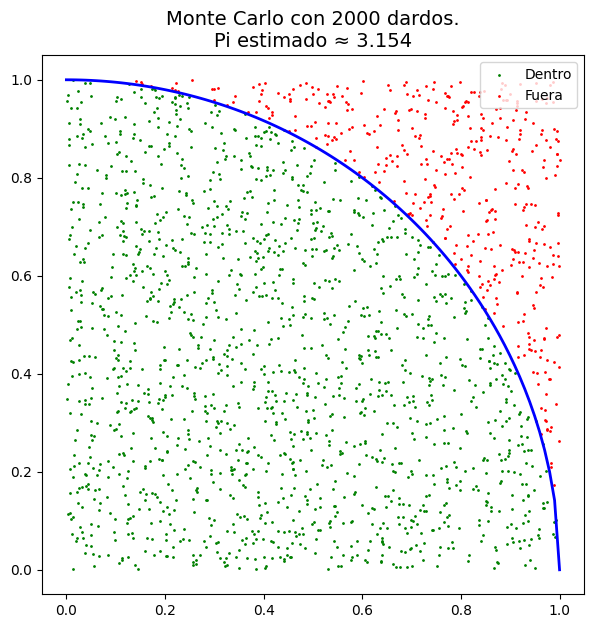

In [3]:
# --- CELDA DE CÓDIGO 3: Lanzando Dardos a Pi ---

def simulacion_monte_carlo_visual(n_dardos):
    # 1. Generar coordenadas aleatorias entre 0 y 1
    x = np.random.rand(n_dardos)
    y = np.random.rand(n_dardos)

    # 2. Calcular la distancia al origen (0,0)
    # Si distancia <= 1, está dentro del círculo
    distancias = np.sqrt(x**2 + y**2)
    dentro = distancias <= 1

    # 3. Calcular Pi
    aciertos = np.sum(dentro)
    pi_estimado = 4 * (aciertos / n_dardos)

    # --- VISUALIZACIÓN ---
    plt.figure(figsize=(7, 7))
    # Dibujar puntos dentro (Verdes) y fuera (Rojos)
    plt.scatter(x[dentro], y[dentro], color='green', s=1, label='Dentro')
    plt.scatter(x[~dentro], y[~dentro], color='red', s=1, label='Fuera')

    # Dibujar el borde del círculo para referencia
    circulo_x = np.linspace(0, 1, 100)
    circulo_y = np.sqrt(1 - circulo_x**2)
    plt.plot(circulo_x, circulo_y, color='blue', linewidth=2)

    plt.title(f"Monte Carlo con {n_dardos} dardos.\nPi estimado ≈ {pi_estimado}", fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

# ¡Lanzamos 2000 dardos!
simulacion_monte_carlo_visual(2000)

## 3. El Duelo Final: Estructura Modular vs. Azar

El método de Monte Carlo es muy útil cuando no conocemos la fórmula de un problema (por ejemplo, simular el clima o la bolsa). Pero para calcular constantes matemáticas, ¿es mejor el azar o el orden?

Vamos a enfrentar vuestro **Algoritmo Modular (Teorema 1)** contra el **Algoritmo Monte Carlo**.

Ambos tendrán el mismo presupuesto: **100.000 operaciones** ($N=100.000$).

¿Quién se acercará más a $\pi$?

In [4]:
# --- CELDA DE CÓDIGO 4: El Duelo Matemático ---

# 1. Aspirante 1: Monte Carlo (Caos)
def monte_carlo_rapido(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    dentro = (x**2 + y**2) <= 1
    return 4 * (np.sum(dentro) / n)

# 2. Aspirante 2: Serie Modular (Orden) - Recordamos la función
def pi_modular_rapido(n):
    suma = 0
    for k in range(n):
        suma += ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
    return 3 * suma

# --- ¡FIGHT! ---
N_duelo = 100000  # Cien mil intentos para cada uno

# Ejecución
pi_azar = monte_carlo_rapido(N_duelo)
pi_orden = pi_modular_rapido(N_duelo)
pi_real = math.pi

# Resultados
error_azar = abs(pi_real - pi_azar)
error_orden = abs(pi_real - pi_orden)

print(f"🥊 RESULTADOS DEL DUELO (N={N_duelo}):")
print("-" * 50)
print(f"🎲 Monte Carlo dice:  {pi_azar:.10f}  | Error: {error_azar:.10f}")
print(f"⚙️ Modular dice:      {pi_orden:.10f}  | Error: {error_orden:.10f}")
print("-" * 50)

if error_orden < error_azar:
    veces_mejor = int(error_azar / error_orden)
    print(f"🏆 GANADOR: ¡El Método Modular!")
    print(f"   El orden es aproximadamente {veces_mejor} veces más preciso que el azar.")
else:
    print("🏆 ¡Sorpresa! El azar ha tenido mucha suerte esta vez (es raro, pero posible).")

🥊 RESULTADOS DEL DUELO (N=100000):
--------------------------------------------------
🎲 Monte Carlo dice:  3.1432000000  | Error: 0.0016073464
⚙️ Modular dice:      3.1415876536  | Error: 0.0000050000
--------------------------------------------------
🏆 GANADOR: ¡El Método Modular!
   El orden es aproximadamente 321 veces más preciso que el azar.


## 🧠 Reflexión: ¿Por qué gana el Orden?

Si habéis ejecutado el código, habréis visto que el método Modular **machaca** al Monte Carlo.

* **Monte Carlo** converge muy lento (su error baja con la raíz cuadrada de $N$, proporcional a $\frac{1}{\sqrt{N}}$). Para ganar un decimal más, necesitas **100 veces más dardos**.
* **La Serie Modular** converge linealmente. Para ganar un decimal, necesitas solo **10 veces más términos**.



### Lección:

> Usar la estructura oculta de los números (el reloj $6k$) siempre es más inteligente que "adivinar" tirando dados. **Las matemáticas tratan de encontrar patrones para no tener que depender de la suerte.**

## 4. Lo Imposible: El Factorial de la Mitad 🤯

Seguro que sabéis calcular un factorial:

* $3! = 3 \times 2 \times 1 = 6$
* $5! = 5 \times 4 \times 3 \times 2 \times 1 = 120$

Pero... ¿qué pasa si os pido calcular el factorial de 0.5?

$$
0.5! = \text{¿?}
$$

Vuestra calculadora normal os dará error. *"¡No puedes multiplicar números hasta llegar al 1 si empiezas en 0.5!"*, dirá.

Pero los matemáticos no se rinden. Inventaron una función suave y continua que conecta todos los factoriales, llamada **Función Gamma** ($\Gamma$).

Y adivinad quién aparece cuando intentamos calcular el factorial de $0.5$... **¡Exacto! Nuestro amigo $\pi$.**

$$
0.5! = \frac{\sqrt{\pi}}{2}
$$

Vamos a usar nuestra **Serie Modular** para calcular este número "imposible".

In [5]:
# --- CELDA DE CÓDIGO 5: Calculando el Factorial de 0.5 (CORREGIDO) ---
import math

def factorial_mitad_modular(n_terminos):
    """
    Calcula 0.5! usando la aproximación modular de Pi.
    Fórmula: 0.5! = sqrt(pi) / 2
    """
    # 1. Rescatamos nuestra fórmula modular (Teorema 1)
    suma = 0
    for k in range(n_terminos):
        termino = ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
        suma += termino
    pi_mod = 3 * suma

    # 2. Aplicamos la fórmula de la Función Gamma
    factorial_medio = math.sqrt(pi_mod) / 2

    return factorial_medio

# --- EXPERIMENTO ---
N = 2000

# CORRECCIÓN: Ahora llamamos a la función con el nombre correcto
resultado = factorial_mitad_modular(N)
valor_real = math.gamma(1.5) # En Python, gamma(n) es (n-1)! -> gamma(1.5) es 0.5!

print(f"🧪 Intentando calcular 0.5! con {N} términos modulares...")
print("-" * 50)
print(f"🔷 Resultado Modular: {resultado:.10f}")
print(f"✅ Valor Real (Gamma): {valor_real:.10f}")
print(f"❌ Error:              {abs(valor_real - resultado):.10f}")

print("\n¡LO HEMOS CONSEGUIDO! 🎉")
print(f"Sabemos que 0.5! es aproximadamente {resultado:.4f}")

🧪 Intentando calcular 0.5! con 2000 términos modulares...
--------------------------------------------------
🔷 Resultado Modular: 0.8861916629
✅ Valor Real (Gamma): 0.8862269255
❌ Error:              0.0000352625

¡LO HEMOS CONSEGUIDO! 🎉
Sabemos que 0.5! es aproximadamente 0.8862


# 🎓 CONCLUSIÓN DE LA TRILOGÍA: El Poder de los Patrones

¡Enhorabuena! Habéis completado el viaje.

Hemos empezado sumando fracciones simples y hemos acabado midiendo la Tierra, simulando el caos y calculando factoriales imposibles.

## ¿Qué hemos aprendido en estos tres talleres?

* **La Estructura lo es todo:** Los números no están desordenados. Usando el "Reloj 6k", descubrimos que los primos y $\pi$ viven en los mismos barrios ($6k \pm 1$).
* **$\pi$ es el pegamento del Universo:** No es solo para círculos. Aparece en la probabilidad (Gauss), en el álgebra (Euler) y en el cálculo avanzado (Gamma). Si $\pi$ cambiara, todo esto se derrumbaría.
* **La Investigación Matemática:** Habéis visto cómo trabaja un matemático actual: no solo busca la respuesta ($3.14...$), sino nuevas formas de llegar a ella para entender mejor el camino.

---

## 🚀 Vuestro Futuro

El descubrimiento que hemos explorado (la estructura modular de $\pi$) es real y reciente. Demuestra que incluso en temas de hace 3000 años, todavía quedan secretos por descubrir.

> **La próxima vez que veáis $\pi$ en una fórmula, recordad:** no es solo un número mágico en la calculadora. Es una estructura infinita hecha de piezas de reloj y números primos.

### ¡Gracias por investigar con nosotros!